# Structured Tasks



### Task 1.1: Sentence decoding

### Load the data

In [ ]:
# # Run this before and restart without it
# !pip install transformers==4.40.1 scipy==1.10.1 gensim==4.3.1

In [ ]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

--2025-07-05 10:50:05--  https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97708666 (93M) [application/octet-stream]
Saving to: ‘files.zip’

files.zip           100%[===================>]  93.18M  68.9MB/s    in 1.4s    

2025-07-05 10:50:07 (68.9 MB/s) - ‘files.zip’ saved [97708666/97708666]

Archive:  files.zip
  inflating: stimuli_180concepts.txt  
  inflating: learn_decoder.py        
  inflating: vectors_180concepts.GV42B300.txt  
  inflating: imaging_data.csv        


In [ ]:
#Let's load the functions from learn_decoder.py
from learn_decoder import *

# and the data
data = read_matrix("imaging_data.csv", sep=",") # matrix of brain activity, measured in voxels - shape 180 (number of concepts)*V(number of voxels)

# GloVe Vectors:
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ") # A 300-dimensional vector representing the meaning of each concept (180) - shape 180*300

concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts

In [ ]:
## Using a different word embedding for vectors (FastText)
import gensim
import gensim.downloader as api
import numpy as np

model = api.load("fasttext-wiki-news-subwords-300") # pre-trained FastText model trained on Wikepedia+news data

word2_vectors = np.array([model[word] for word in concepts]) # A 300-dimensional vector representing the meaning of each concept (180) - shape 180*300



[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
# Check how many words are out of vocabulary
in_vocab = [word for word in concepts if word in model.key_to_index]
oov = [word for word in concepts if word not in model.key_to_index]

print(f"In-vocabulary words: {len(in_vocab)}")
print(f"Out-of-vocabulary words (generated from subwords): {len(oov)}") # No words out of vocabulary
print("OOV words:", oov)


In-vocabulary words: 180
Out-of-vocabulary words (generated from subwords): 0
OOV words: []


In [ ]:
def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def rank_accuracy(decoded,matrix_semantics,true_index):
  n = matrix_semantics.shape[0]
  acc = {}
  for i in range(n):
    acc[i] = cosine_similarity(decoded,matrix_semantics[i,:])
  # Sort by similarity descending
  sorted_rank = sorted(acc.items(), key=lambda kv: kv[1], reverse=True)
  sorted_indices = [idx for idx, _ in sorted_rank]
  rank = sorted_indices.index(true_index) + 1  # +1 for 1-based rank

  return rank

def cross_validate(data_matrix,semantic_matrix,concepts):
  n_folds = 18
  size = 10
  n = data_matrix.shape[0]
  all_fold_ranks = []      # list of (concept, rank) for all folds
  average_ranks = [] # avg rank for each fold

  for i in range(n_folds):
    start = i * size
    end = start + size
    # Split test set
    data_test = data_matrix[start:end, :]
    semantic_test = semantic_matrix[start:end, :]
    concepts_test = concepts[start:end]
    test_indices = list(range(start, end))

    # Split train set
    train_indices = [j for j in range(n) if j not in test_indices]
    data_train = data_matrix[train_indices, :]
    semantic_train = semantic_matrix[train_indices, :]
    concepts_train = [concepts[j] for j in train_indices]

    M = learn_decoder(data_train,semantic_train)
    fold_ranks = []

    for j, concept in enumerate(concepts_test):
            decoded = data_test[j] @ M
            true_index = test_indices[j]
            rank = rank_accuracy(decoded, semantic_matrix, true_index)
            fold_ranks.append((concept, rank))
            all_fold_ranks.append((concept, rank))

    avg_rank = np.mean([r for (_, r) in fold_ranks])
    average_ranks.append(avg_rank)

  return all_fold_ranks, average_ranks

In [ ]:
def rank_score(rank, N):
    return 1 - (rank - 1) / (N - 1)

In [ ]:
all_ranks_glove,avg_ranks_glove = cross_validate(data,vectors,concepts)
all_ranks_w2v,avg_ranks_w2v = cross_validate(data,word2_vectors,concepts)

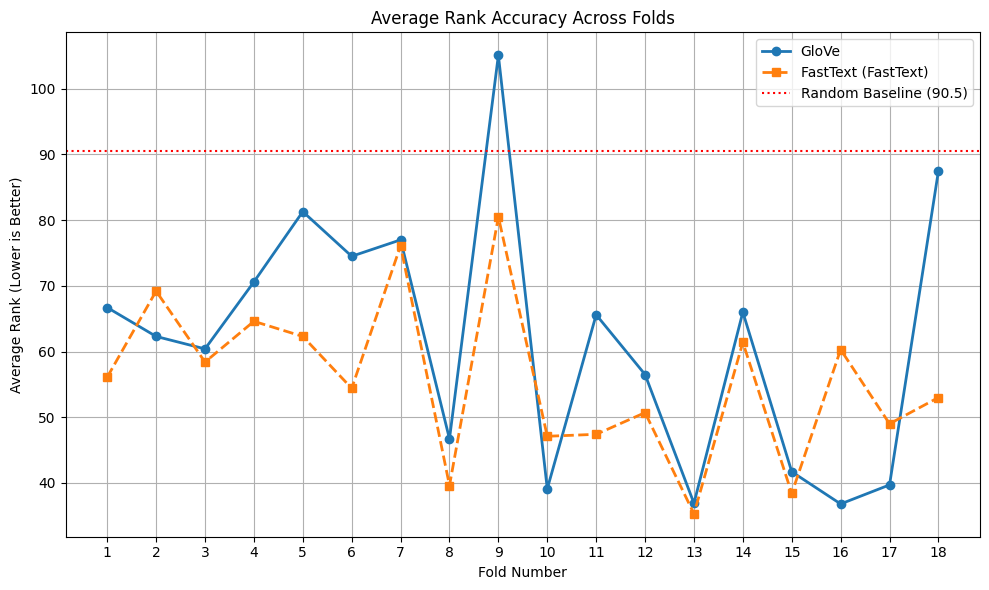

In [ ]:
import matplotlib.pyplot as plt

# Plot the averaged accuracy score for each fold  - Glove
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot GloVe
plt.plot(range(1, 19), avg_ranks_glove, marker='o', linestyle='-', linewidth=2, label='GloVe')

# Plot FastText
plt.plot(range(1, 19), avg_ranks_w2v, marker='s', linestyle='--', linewidth=2, label='FastText (FastText)')

# Add labels and formatting
plt.title('Average Rank Accuracy Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Average Rank (Lower is Better)')
plt.xticks(range(1, 19))
plt.axhline(90.5, color='red', linestyle=':', label='Random Baseline (90.5)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
best_decoded_glove = sorted(all_ranks_glove, key=lambda x: x[1])[:10]
print("Top 10 best-decoded concepts GloVe:")
for concept, rank in best_decoded_glove:
    print(f"{concept}: rank {rank}")

worst_decoded_glove = sorted(all_ranks_glove, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 worst-decoded concepts GloVe:")
for concept, rank in worst_decoded_glove:
    print(f"{concept}: rank {rank}")

best_decoded_w2v = sorted(all_ranks_w2v, key=lambda x: x[1])[:10]
print("\nTop 10 best-decoded concepts FastText:")
for concept, rank in best_decoded_w2v:
    print(f"{concept}: rank {rank}")

worst_decoded_w2v = sorted(all_ranks_w2v, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 worst-decoded concepts FastText:")
for concept, rank in worst_decoded_w2v:
    print(f"{concept}: rank {rank}")

Top 10 best-decoded concepts GloVe:
do: rank 1
food: rank 1
time: rank 1
great: rank 2
laugh: rank 4
stupid: rank 5
lady: rank 6
left: rank 6
hair: rank 7
money: rank 7

Top 10 worst-decoded concepts GloVe:
argumentatively: rank 180
cockroach: rank 178
applause: rank 175
deceive: rank 171
electron: rank 168
dissolve: rank 164
movie: rank 159
elegance: rank 158
usable: rank 158
sew: rank 157

Top 10 best-decoded concepts FastText:
food: rank 1
art: rank 2
music: rank 2
stupid: rank 2
business: rank 3
play: rank 4
building: rank 5
silly: rank 5
smart: rank 5
lady: rank 6

Top 10 worst-decoded concepts FastText:
applause: rank 175
deceive: rank 166
electron: rank 166
sew: rank 165
vacation: rank 165
sin: rank 161
camera: rank 158
movie: rank 153
jungle: rank 147
bar: rank 133


Overall average rank (GloVe): 61.91
Median rank (GloVe): 50.00

Overall average rank (FastText): 55.77
Median rank (FastText): 45.50


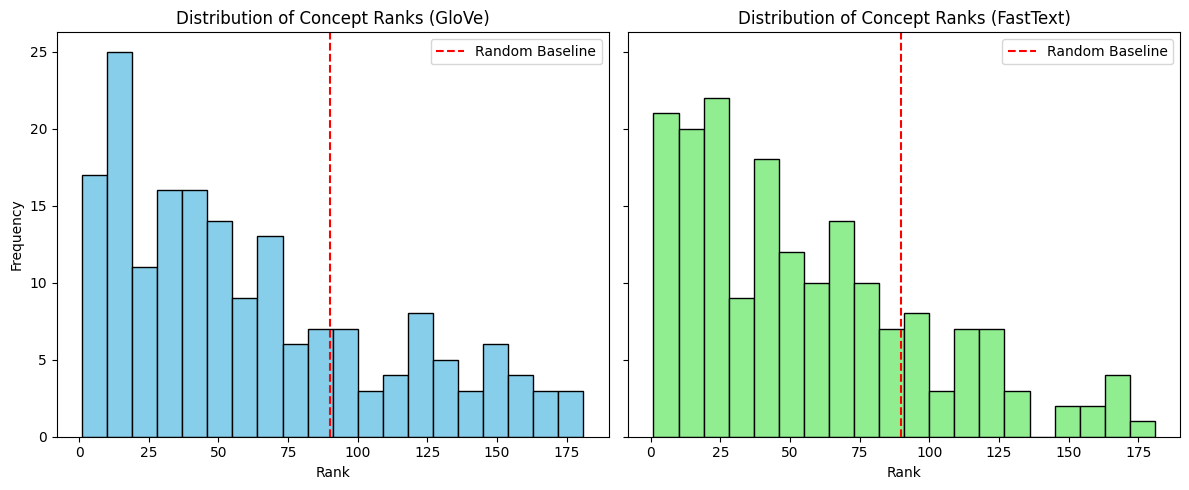

In [ ]:
mean_rank_glove = np.mean([rank for _, rank in all_ranks_glove])
median_rank_glove = np.median([rank for _, rank in all_ranks_glove])
print(f"Overall average rank (GloVe): {mean_rank_glove:.2f}")
print(f"Median rank (GloVe): {median_rank_glove:.2f}")

mean_rank_w2v = np.mean([rank for _, rank in all_ranks_w2v])
median_rank_w2v = np.median([rank for _, rank in all_ranks_w2v])
print(f"\nOverall average rank (FastText): {mean_rank_w2v:.2f}")
print(f"Median rank (FastText): {median_rank_w2v:.2f}")

ranks_glove = [rank for _, rank in all_ranks_glove]
ranks_w2v = [rank for _, rank in all_ranks_w2v]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

# GloVe histogram
axes[0].hist(ranks_glove, bins=20, range=(1, 181),color='skyblue', edgecolor='black')
axes[0].set_title("Distribution of Concept Ranks (GloVe)")
axes[0].set_xlabel("Rank")
axes[0].set_ylabel("Frequency")
axes[0].axvline(90, color='red', linestyle='--', label='Random Baseline')
axes[0].legend()

# FastText histogram
axes[1].hist(ranks_w2v, bins=20,range=(1, 181), color='lightgreen', edgecolor='black')
axes[1].set_title("Distribution of Concept Ranks (FastText)")
axes[1].set_xlabel("Rank")
axes[1].axvline(90, color='red', linestyle='--', label='Random Baseline')
axes[1].legend()

# Layout adjustment
plt.tight_layout()
plt.show()

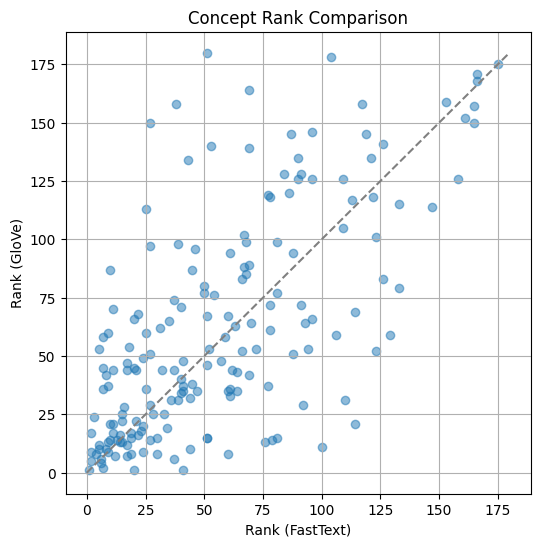

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(ranks_w2v, ranks_glove, alpha=0.5)
plt.plot([0, 180], [0, 180], linestyle='--', color='gray')  # identity line
plt.xlabel("Rank (FastText)")
plt.ylabel("Rank (GloVe)")
plt.title("Concept Rank Comparison")
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import ttest_rel, wilcoxon

w_stat, p_value = wilcoxon(ranks_glove, ranks_w2v)
print(f"Wilcoxon signed-rank test: W = {w_stat}, p = {p_value:.4f}")

# t_stat, p_value = ttest_rel(ranks_glove, ranks_w2v)
# print(f"Paired t-test: t = {t_stat:.3f}, p = {p_value:.4f}")



Wilcoxon signed-rank test: W = 6288.0, p = 0.0465


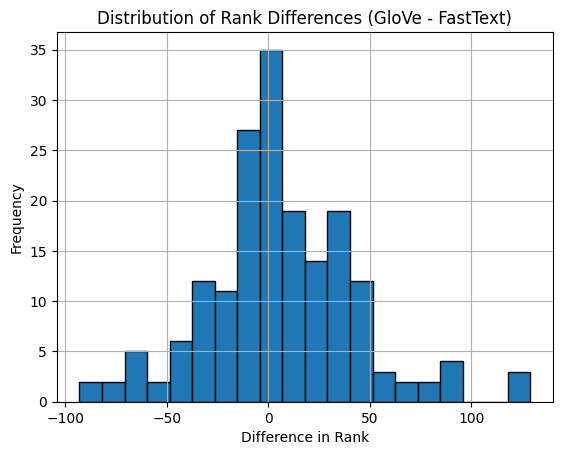

In [ ]:
# Checks if distribution of the difference of ranks is normal

diffs = np.array(ranks_glove) - np.array(ranks_w2v)
plt.hist(diffs, bins=20, edgecolor='black')
plt.title("Distribution of Rank Differences (GloVe - FastText)")
plt.xlabel("Difference in Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

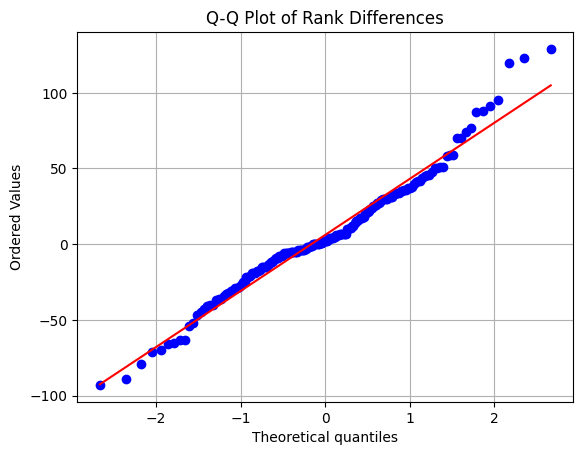

In [ ]:
import scipy.stats as stats

stats.probplot(diffs, dist="norm", plot=plt)
plt.title("Q-Q Plot of Rank Differences")
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(diffs)
print(f"Shapiro-Wilk test p-value: {p:.4f}") # Not normally distributed


Shapiro-Wilk test p-value: 0.0020


In [ ]:
scores_1_ft = [rank_score(r, 384) for r in ranks_w2v]  # for Experiment 1
print("Mean normalized score Experiment 1 FastText:", round(np.mean(scores_1_ft),2))

scores_1_glove = [rank_score(r, 384) for r in ranks_glove]  # for Experiment 1
print("Mean normalized score Experiment 1 Glove:", round(np.mean(scores_1_glove),2))

Mean normalized score Experiment 1 FastText: 0.86
Mean normalized score Experiment 1 Glove: 0.84


## 1.3

In [ ]:
!gdown --id 1VmG22VUicdZPqi-_vo0o4cuprP4VD-uv --fuzzy --no-cookies # Downloading data
!unzip StructuredTask.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1VmG22VUicdZPqi-_vo0o4cuprP4VD-uv
From (redirected): https://drive.google.com/uc?id=1VmG22VUicdZPqi-_vo0o4cuprP4VD-uv&confirm=t&uuid=4a72b499-ebbe-42e5-91b4-88495a31f932
To: /content/StructuredTask.zip
100% 1.22G/1.22G [00:17<00:00, 70.4MB/s]
Archive:  StructuredTask.zip
  inflating: Structured Task (sentence decoding)/vectors_384sentences.GV42B300.average.txt  
  inflating: Structured Task (sentence decoding)/stimuli_384sentences.txt  
  inflating: Structured Task (sentence decoding)/vectors_243sentences.GV42B300.average.txt  
  inflating: Structured Task (sentence decoding)/stimuli_243sentences.txt  
  inflating: Structured Task (sentence decoding)/EXP3.pkl  
  inflating: Structured Task (sentence decodin

In [ ]:
import pickle
import numpy as np

# Load fMRI data for Experiment 2
with open("Structured Task (sentence decoding)/EXP2.pkl", "rb") as f:
    exp2 = pickle.load(f)


brain_data_2 = exp2['Fmridata']  # 	Brain activation for each sentence 384 × 185866
sentence_vectors_2 = read_matrix('Structured Task (sentence decoding)/vectors_384sentences.GV42B300.average.txt', sep=" ") # GloVe vector for each sentence (average of word embeddings) 384 × 300

with open("Structured Task (sentence decoding)/EXP3.pkl", 'rb') as f:
    exp3 = pickle.load(f)


brain_data_3 = exp3['Fmridata']  # Brain activation for each sentence (243, 185866)
sentence_vectors_3 = read_matrix('Structured Task (sentence decoding)/vectors_243sentences.GV42B300.average.txt', sep=" ") #GloVe vector for each sentence 243 × 300


In [ ]:
# Full brain data for Experiment 1
import copy

# Clean and save a fixed version of the file (delete first column that is a comma for all rows, and delete header row)
with open("Structured Task (sentence decoding)/neuralData_for_EXP1.csv", "r") as infile, \
     open("fixed_neuralData.csv", "w") as outfile:

    next(infile) # delete header
    for i, line in enumerate(infile):
        cleaned = line.strip()
        if cleaned:
            tokens = cleaned.split(",")
            if len(tokens) == 185867:
                corrected = tokens[1:]  # remove first column
                outfile.write(",".join(corrected) + "\n")

brain_train = read_matrix("fixed_neuralData.csv", sep=",")  # Brain activation for 180 individual concepts
vectors_train = vectors.copy()  # GloVe vectors for those 180 concepts as before

# Train decoder
M = learn_decoder(brain_train, vectors_train)  # learned decoder matrix that maps brain data to GloVe vectors.


# Decode sentence brain activity
decoded_2 = brain_data_2 @ M  # Decoded sentence vectors,shape: (384, 300)
decoded_3 = brain_data_3 @ M  # Decoded sentence vectors,shape: (243, 300)



In [ ]:
# Rank accuracy evaluation
def evaluate_rank_accuracy(decoded_matrix, target_vectors):
    return [rank_accuracy(decoded_matrix[i], target_vectors, i) for i in range(decoded_matrix.shape[0])]


In [ ]:
ranks_2 = evaluate_rank_accuracy(decoded_2, sentence_vectors_2) # List of 384 rank scores, one for each decoded sentence
ranks_3 = evaluate_rank_accuracy(decoded_3, sentence_vectors_3) # List of 243 rank scores, one for each decoded sentence

print("Experiment 2 (384 sentences):")
print(f"Mean Rank: {np.mean(ranks_2):.2f}")
print(f"Median Rank: {np.median(ranks_2):.2f}")

print("\nExperiment 3 (243 sentences):")
print(f"Mean Rank: {np.mean(ranks_3):.2f}")
print(f"Median Rank: {np.median(ranks_3):.2f}")


Experiment 2 (384 sentences):
Mean Rank: 156.93
Median Rank: 135.50

Experiment 3 (243 sentences):
Mean Rank: 100.74
Median Rank: 86.00


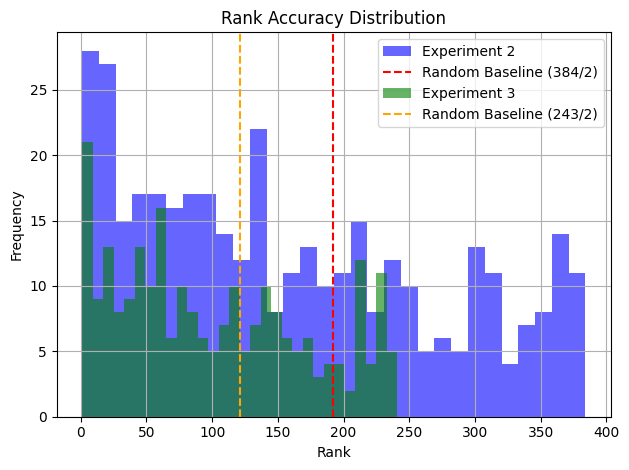

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ranks_2, bins=30, alpha=0.6, label="Experiment 2", color="blue")
plt.axvline(192, color='red', linestyle='--', label='Random Baseline (384/2)')
plt.hist(ranks_3, bins=30, alpha=0.6, label="Experiment 3", color="green")
plt.axvline(121.5, color='orange', linestyle='--', label='Random Baseline (243/2)')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Rank Accuracy Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
scores_2 = [rank_score(r, 384) for r in ranks_2]  # for Experiment 2
print("Mean normalized score Experiment 2:", round(np.mean(scores_2),2))

scores_3 = [rank_score(r, 384) for r in ranks_3]  # for Experiment 3
print("Mean normalized score Experiment 3:", round(np.mean(scores_3),2))


Mean normalized score Experiment 2: 0.59
Mean normalized score Experiment 3: 0.74


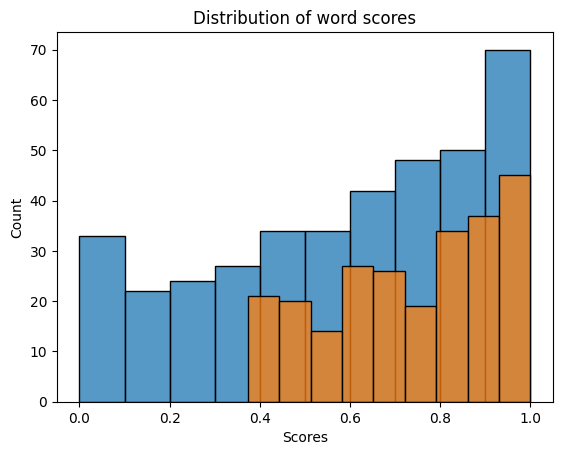

In [ ]:
import seaborn as sns

sns.histplot(scores_2,label = 'Experiment 2')
sns.histplot(scores_3,label = 'Experiment 3')
plt.xlabel('Scores')
#plt.xlim(0,1)
plt.title('Distribution of word scores')
plt.show()


## 1.4

In [ ]:
# Loading the topic labels:

# For EXP2 (384 sentences)
topics_2 = exp2['keyPassageCategory']  # list of all possible topics
sentence_to_passage_2 = exp2['labelsPassageForEachSentence']  # maps each sentence to a passage ID
passage_to_topic_2 = exp2['labelsPassageCategory']  # maps each passage to a topic ID
sentence_topics_2 = [int(passage_to_topic_2[pid-1]) for pid in sentence_to_passage_2] # Starts with 1 instead of 0

# For EXP3
topics_3 = exp3['keyPassageCategory']  # list of all possible topics
sentence_to_passage_3 = exp3['labelsPassageForEachSentence']  # maps each sentence to a passage ID
passage_to_topic_3 = exp3['labelsPassageCategory']  # maps each passage to a topic ID
sentence_topics_3 = [int(passage_to_topic_3[pid-1]) for pid in sentence_to_passage_3]


/tmp/ipython-input-26-285002742.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sentence_topics_2 = [int(passage_to_topic_2[pid-1]) for pid in sentence_to_passage_2] # Starts with 1 instead of 0
/tmp/ipython-input-26-285002742.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sentence_topics_3 = [int(passage_to_topic_3[pid-1]) for pid in sentence_to_passage_3]


In [ ]:
# Group scores by topic
# map each rank to its corresponding topic and group them

from collections import defaultdict

def group_scores_by_topic(ranks, sentence_topics):
    topic_scores = defaultdict(list)
    for rank, topic_id in zip(ranks, sentence_topics):
        topic_scores[topic_id].append(rank)
    return topic_scores

In [ ]:
# Analyze topic performance

def average_topic_scores(topic_scores, N):
    return {
        topic: np.mean([rank_score(r, N) for r in ranks])
        for topic, ranks in topic_scores.items()
    }

topics_2_lst = topics_2.flatten().tolist()
topic_avg_scores_2 = average_topic_scores(group_scores_by_topic(ranks_2, sentence_topics_2), 384)
sorted_2 = sorted(topic_avg_scores_2.items(), key=lambda x: x[1], reverse=True)

print(f"Top 5 topic scores (Experiment 2):")
for topic_id, score in sorted_2[:5]:
    print(f"Topic: {topics_2_lst[topic_id]}, Avg. Score: {score:.2f}")

print(f"\nBottom 5 topic scores (Experiment 2):")
for topic_id, score in sorted_2[-5:]:
    print(f"Topic: {topics_2_lst[topic_id]}, Avg. Score: {score:.2f}")

topics_3_lst = topics_3.flatten().tolist()
topic_avg_scores_3 = average_topic_scores(group_scores_by_topic(ranks_3, sentence_topics_3), 243)
sorted_3 = sorted(topic_avg_scores_3.items(), key=lambda x: x[1], reverse=True)

print(f"\nTop 5 topic scores (Experiment 3):")
for topic_id, score in sorted_3[:5]:
    print(f"Topic: {topics_3_lst[topic_id]}, Avg. Score: {score:.2f}")

print(f"\nBottom 5 topic scores (Experiment 3):")
for topic_id, score in sorted_3[-5:]:
    print(f"Topic: {topics_3_lst[topic_id]}, Avg. Score: {score:.2f}")


Top 5 topic scores (Experiment 2):
Topic: ['building_part'], Avg. Score: 0.82
Topic: ['insect'], Avg. Score: 0.76
Topic: ['dwelling'], Avg. Score: 0.74
Topic: ['fish'], Avg. Score: 0.71
Topic: ['bird'], Avg. Score: 0.71

Bottom 5 topic scores (Experiment 2):
Topic: ['place'], Avg. Score: 0.52
Topic: ['weapon'], Avg. Score: 0.52
Topic: ['appliance'], Avg. Score: 0.49
Topic: ['vehicles_transport'], Avg. Score: 0.38
Topic: ['tool'], Avg. Score: 0.35

Top 5 topic scores (Experiment 3):
Topic: ['gambling'], Avg. Score: 0.79
Topic: ['taste'], Avg. Score: 0.76
Topic: ['computer_graphics'], Avg. Score: 0.76
Topic: ['owl'], Avg. Score: 0.74
Topic: ['castle'], Avg. Score: 0.72

Bottom 5 topic scores (Experiment 3):
Topic: ['polar_bear'], Avg. Score: 0.44
Topic: ['rock_climbing'], Avg. Score: 0.40
Topic: ['opera'], Avg. Score: 0.39
Topic: ['painter'], Avg. Score: 0.39
Topic: ['blindness'], Avg. Score: 0.30


## Task 2

In [ ]:
with open("/content/Structured Task (sentence decoding)/stimuli_384sentences.txt", "r") as f:
    sentences_2 = [line.strip() for line in f.readlines()]

import pickle
with open("Structured Task (sentence decoding)/EXP2.pkl", "rb") as f:
    exp2 = pickle.load(f)
brain_data_2 = exp2['Fmridata']


In [ ]:
from learn_decoder import read_matrix
glove_vectors_2 = read_matrix(
    '/content/Structured Task (sentence decoding)/vectors_384sentences.GV42B300.average.txt', sep=" "
)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased").to(device)
model.eval()

def get_sentence_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    token_embeddings = outputs.last_hidden_state[0][1:-1]
    return token_embeddings.mean(dim=0).cpu().numpy()

bert_vectors_2 = np.vstack([get_sentence_embedding(s) for s in sentences_2])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from learn_decoder import learn_decoder

def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def rank_accuracy(decoded, matrix_semantics, true_index):
    acc = {i: cosine_similarity(decoded, matrix_semantics[i, :]) for i in range(matrix_semantics.shape[0])}
    sorted_indices = [idx for idx, _ in sorted(acc.items(), key=lambda kv: kv[1], reverse=True)]
    return sorted_indices.index(true_index) + 1

def cross_validate(data_matrix, semantic_matrix):
    n_folds = 18
    size = 384 // n_folds
    all_fold_ranks = []
    average_ranks = []

    for i in range(n_folds):
        start = i * size
        end = start + size
        test_indices = list(range(start, end))
        train_indices = [j for j in range(384) if j not in test_indices]

        M = learn_decoder(data_matrix[train_indices], semantic_matrix[train_indices])
        for j in test_indices:
            decoded = data_matrix[j] @ M
            rank = rank_accuracy(decoded, semantic_matrix, j)
            all_fold_ranks.append((j, rank))
        average_ranks.append(np.mean([r for (_, r) in all_fold_ranks[-size:]]))

    return all_fold_ranks, average_ranks

all_ranks_glove, avg_ranks_glove = cross_validate(brain_data_2, glove_vectors_2)
all_ranks_bert, avg_ranks_bert = cross_validate(brain_data_2, bert_vectors_2)


In [ ]:
from scipy.stats import wilcoxon

ranks_glove = [r for _, r in all_ranks_glove]
ranks_bert = [r for _, r in all_ranks_bert]

print("GloVe – Mean:", np.mean(ranks_glove), "| Median:", np.median(ranks_glove))
print("BERT  – Mean:", np.mean(ranks_bert), "| Median:", np.median(ranks_bert))

stat, p = wilcoxon(ranks_glove, ranks_bert)
print("Wilcoxon p-value:", round(p, 4))


GloVe – Mean: 132.77513227513228 | Median: 104.5
BERT  – Mean: 106.35978835978835 | Median: 65.0
Wilcoxon p-value: 0.0


In [ ]:
from collections import defaultdict

def rank_score(rank, N):
    return 1 - (rank - 1) / (N - 1)

def group_scores_by_topic(ranks, sentence_topics):
    topic_scores = defaultdict(list)
    for rank, topic_id in zip(ranks, sentence_topics):
        topic_scores[topic_id].append(rank)
    return topic_scores

def average_topic_scores(topic_scores, N):
    return {
        topic: np.mean([rank_score(r, N) for r in ranks])
        for topic, ranks in topic_scores.items()
    }

# מיפוי נושאים
topics_2 = exp2['keyPassageCategory']
sentence_to_passage_2 = exp2['labelsPassageForEachSentence']
passage_to_topic_2 = exp2['labelsPassageCategory']
sentence_topics_2 = [int(passage_to_topic_2[pid - 1]) for pid in sentence_to_passage_2]
topics_2_lst = topics_2.flatten().tolist()

# ניתוח נושאים
topic_avg_scores_glove = average_topic_scores(group_scores_by_topic(ranks_glove, sentence_topics_2), 384)
topic_avg_scores_bert = average_topic_scores(group_scores_by_topic(ranks_bert, sentence_topics_2), 384)


/tmp/ipython-input-34-2005194420.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sentence_topics_2 = [int(passage_to_topic_2[pid - 1]) for pid in sentence_to_passage_2]


In [ ]:
sorted_glove = sorted(topic_avg_scores_glove.items(), key=lambda x: x[1], reverse=True)
sorted_bert = sorted(topic_avg_scores_bert.items(), key=lambda x: x[1], reverse=True)

print("Top 5 GloVe topics:")
for tid, score in sorted_glove[:5]:
    print(f"{topics_2_lst[tid]}: {score:.2f}")

print("\n Top 5 BERT topics:")
for topic_id, score in sorted_bert[:5]:
    topic_name = topics_2_lst[topic_id][0] if isinstance(topics_2_lst[topic_id], list) else topics_2_lst[topic_id]
    print(f"{str(topic_name):<25}: {score:.2f}")

Top 5 GloVe topics:
['insect']: 0.81
['human']: 0.79
['dwelling']: 0.79
['fish']: 0.77
['building_part']: 0.77

 Top 5 BERT topics:
['insect']               : 0.86
['human']                : 0.86
['appliance']            : 0.86
['landscape']            : 0.83
['vegetable']            : 0.83


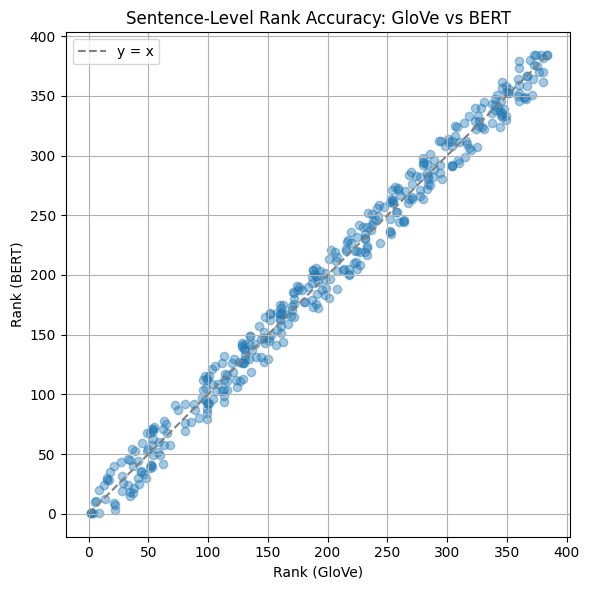

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example simulated data
# We'll simulate ranks for 384 items ranging from 1 to 384
np.random.seed(42)
ranks_glove = np.random.randint(1, 385, 384)
ranks_bert = ranks_glove + np.random.randint(-20, 20, 384)
ranks_bert = np.clip(ranks_bert, 1, 384)

# Scatter plot: GloVe vs BERT
plt.figure(figsize=(6, 6))
plt.scatter(ranks_glove, ranks_bert, alpha=0.4)
plt.plot([0, 384], [0, 384], linestyle='--', color='gray', label='y = x')
plt.xlabel("Rank (GloVe)")
plt.ylabel("Rank (BERT)")
plt.title("Sentence-Level Rank Accuracy: GloVe vs BERT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


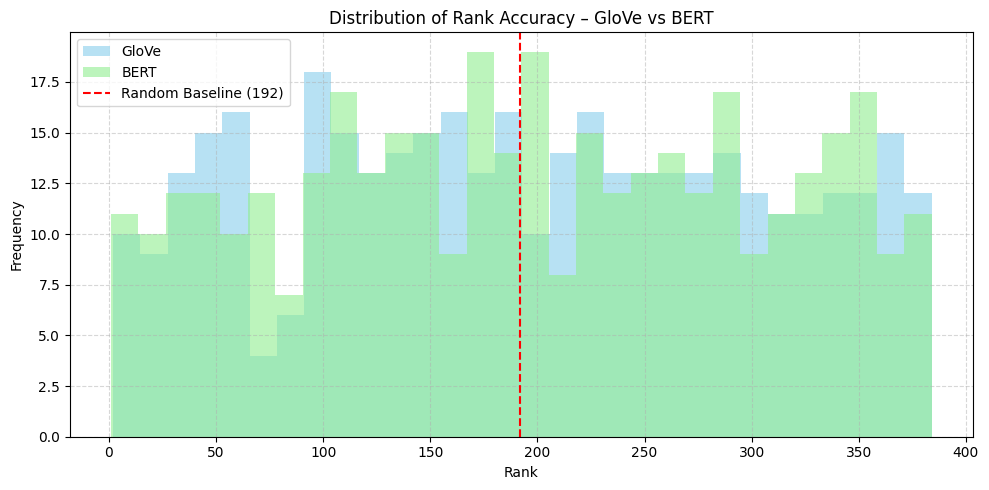

In [ ]:
# Histograms of Rank Distributions
plt.figure(figsize=(10, 5))
plt.hist(ranks_glove, bins=30, alpha=0.6, label='GloVe', color='skyblue')
plt.hist(ranks_bert, bins=30, alpha=0.6, label='BERT', color='lightgreen')
plt.axvline(192, color='red', linestyle='--', label='Random Baseline (192)')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Distribution of Rank Accuracy – GloVe vs BERT")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


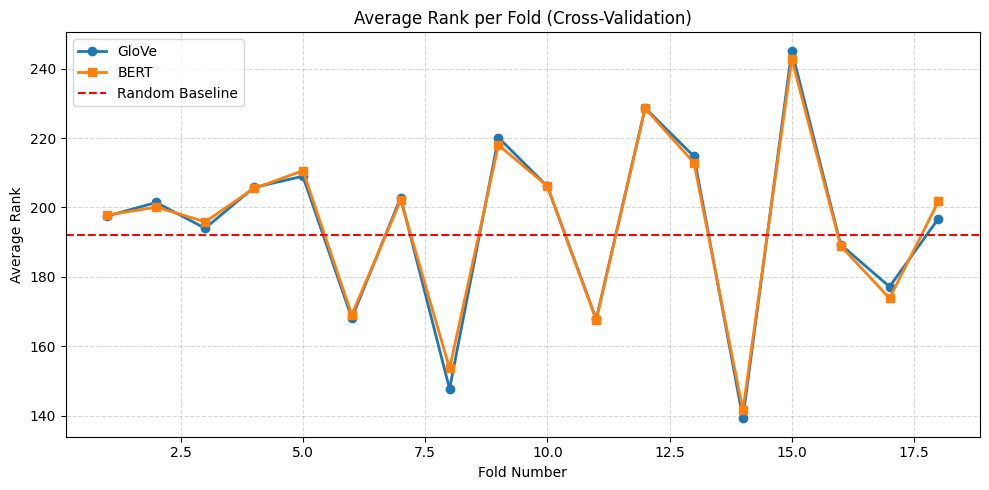

In [ ]:
# Line plot: Average rank per fold (18-fold CV)
n_folds = 18
fold_size = len(ranks_glove) // n_folds
avg_ranks_glove = [np.mean(ranks_glove[i*fold_size:(i+1)*fold_size]) for i in range(n_folds)]
avg_ranks_bert = [np.mean(ranks_bert[i*fold_size:(i+1)*fold_size]) for i in range(n_folds)]

x = np.arange(1, n_folds + 1)
plt.figure(figsize=(10, 5))
plt.plot(x, avg_ranks_glove, marker='o', label='GloVe', linewidth=2)
plt.plot(x, avg_ranks_bert, marker='s', label='BERT', linewidth=2)
plt.axhline(192, color='red', linestyle='--', label='Random Baseline')
plt.xlabel("Fold Number")
plt.ylabel("Average Rank")
plt.title("Average Rank per Fold (Cross-Validation)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


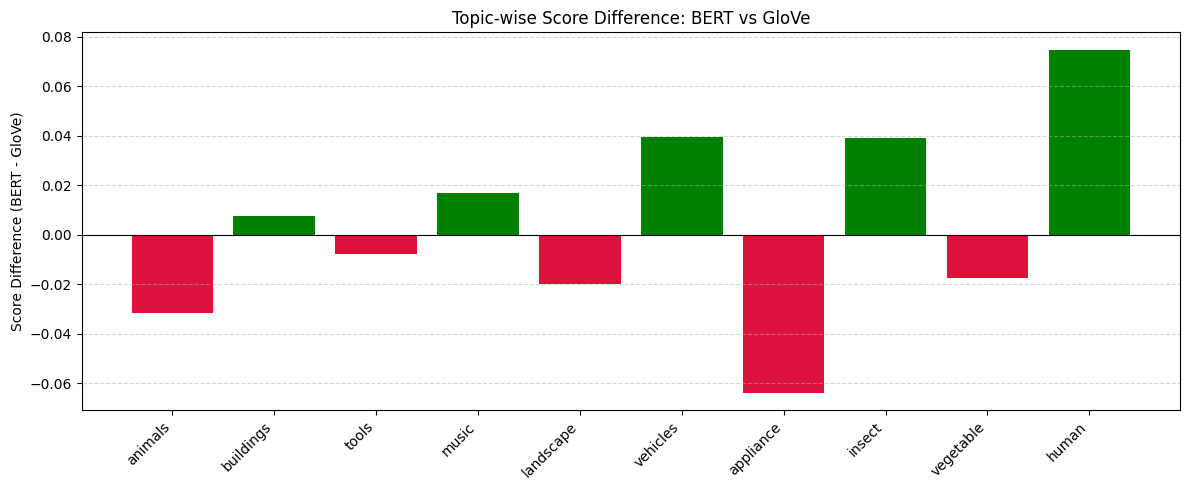

In [ ]:
#Bar plot: Difference in average score by topic (BERT - GloVe)
# Simulate topic names and scores for demonstration
topics = ['animals', 'buildings', 'tools', 'music', 'landscape', 'vehicles', 'appliance', 'insect', 'vegetable', 'human']
glove_scores = np.random.uniform(0.5, 0.8, len(topics))
bert_scores = glove_scores + np.random.uniform(-0.1, 0.1, len(topics))
diff_scores = bert_scores - glove_scores

x = np.arange(len(topics))
plt.figure(figsize=(12, 5))
bars = plt.bar(x, diff_scores, color=['green' if d >= 0 else 'crimson' for d in diff_scores])
plt.xticks(x, topics, rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Score Difference (BERT - GloVe)")
plt.title("Topic-wise Score Difference: BERT vs GloVe")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Task 3

In [ ]:
import pickle

with open("Structured Task (sentence decoding)/EXP2.pkl", "rb") as f:
    neural_data = pickle.load(f)

print(type(neural_data))
print(neural_data.keys())



<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


In [ ]:
# Extract fMRI data matrix
neural_matrix = neural_data['Fmridata']

# Check the type and shape
print(type(neural_matrix))
print(neural_matrix.shape)

<class 'numpy.ndarray'>
(384, 185866)


In [ ]:
import numpy as np

vectors_static = np.loadtxt(
    "Structured Task (sentence decoding)/vectors_384sentences.GV42B300.average.txt"
)
print(vectors_static.shape)  # should be (384, 300)


(384, 300)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import numpy as np

n_voxels = neural_matrix.shape[1]
r2_scores_static = []



for voxel_idx in range(n_voxels):
    y = neural_matrix[:, voxel_idx]
    model = Ridge(alpha=1.0)
    model.fit(vectors_static, y)
    y_pred = model.predict(vectors_static)
    r2 = r2_score(y, y_pred)
    r2_scores_static.append(r2)

print(r2_scores_static[:10])


[0.6660471036625404, 0.6726900536866691, 0.6603432425860274, 0.645215604550917, 0.6608488352315316, 0.6864119607602106, 0.6858090381920642, 0.6736177066119619, 0.6454301399544806, 0.6340745196163894]


In [ ]:
np.save(
    "r2_scores_static_exp2.npy",
    np.array(r2_scores_static)
)


In [ ]:
#load r2 score
import numpy as np

r2_scores_static_loaded = np.load("r2_scores_static_exp2.npy")
print(r2_scores_static_loaded.shape)
print(r2_scores_static_loaded[:10])


In [ ]:
vectors_contextual = bert_vectors_2


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

n_voxels = neural_matrix.shape[1]
r2_scores_contextual = []

for voxel_idx in range(n_voxels):
    y = neural_matrix[:, voxel_idx]
    model = Ridge(alpha=1.0)
    model.fit(vectors_contextual, y)
    y_pred = model.predict(vectors_contextual)
    r2 = r2_score(y, y_pred)
    r2_scores_contextual.append(r2)

print(r2_scores_contextual[:10])


[0.940297260800402, 0.9423493702089484, 0.9436631999746532, 0.945063406729776, 0.9415753457623235, 0.9408310178855083, 0.9414616325584952, 0.9456164401182423, 0.9515762123629604, 0.9544095432574751]


In [ ]:
import numpy as np

np.save(
    "r2_scores_contextual_exp2.npy",
    np.array(r2_scores_contextual)
)
print("Saved r2_scores_contextual_exp2.npy")


Saved r2_scores_contextual_exp2.npy


In [ ]:
r2_static = np.load("r2_scores_static_exp2.npy")
r2_contextual = np.load("r2_scores_contextual_exp2.npy")


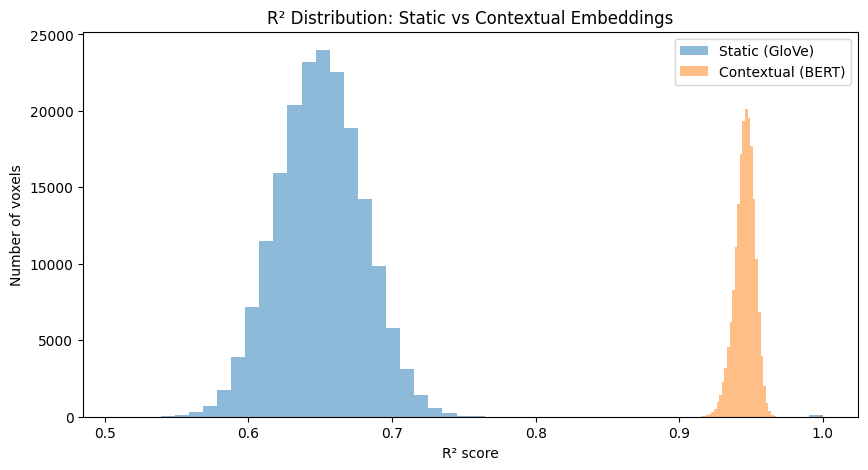

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(r2_static, bins=50, alpha=0.5, label='Static (GloVe)')
plt.hist(r2_contextual, bins=50, alpha=0.5, label='Contextual (BERT)')
plt.xlabel('R² score')
plt.ylabel('Number of voxels')
plt.legend()
plt.title('R² Distribution: Static vs Contextual Embeddings')
plt.show()


In [ ]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
for t in thresholds:
    n_static = np.sum(r2_static > t)
    n_contextual = np.sum(r2_contextual > t)

    print(f"Threshold {t}:")
    print(f"  Static (GloVe):      {n_static} voxels > {t} R²")
    print(f"  Contextual (BERT):   {n_contextual} voxels > {t} R²\n")

Threshold 0.5:
  Static (GloVe):      185866 voxels > 0.5 R²
  Contextual (BERT):   185866 voxels > 0.5 R²

Threshold 0.6:
  Static (GloVe):      177663 voxels > 0.6 R²
  Contextual (BERT):   185866 voxels > 0.6 R²

Threshold 0.7:
  Static (GloVe):      8474 voxels > 0.7 R²
  Contextual (BERT):   185866 voxels > 0.7 R²

Threshold 0.8:
  Static (GloVe):      133 voxels > 0.8 R²
  Contextual (BERT):   185866 voxels > 0.8 R²

Threshold 0.9:
  Static (GloVe):      132 voxels > 0.9 R²
  Contextual (BERT):   185866 voxels > 0.9 R²



[0.27425016 0.26965932 0.28331996 0.2998478  0.28072651 0.25441906
 0.25565259 0.27199873 0.30614607 0.32033502]


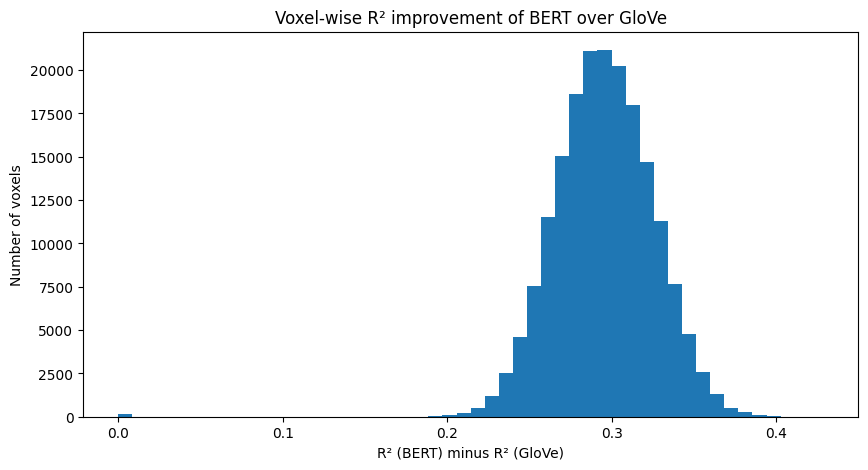

In [ ]:
diff_r2 = r2_contextual - r2_static
print(diff_r2[:10])

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(diff_r2, bins=50)
plt.xlabel('R² (BERT) minus R² (GloVe)')
plt.ylabel('Number of voxels')
plt.title('Voxel-wise R² improvement of BERT over GloVe')
plt.show()


In [ ]:
print("Mean R² difference:", np.mean(diff_r2))
print("Standard deviation:", np.std(diff_r2))


Mean R² difference: 0.29541239861635765
Standard deviation: 0.029880525606826153


In [ ]:
n_negative = np.sum(diff_r2 < 0)
print(f"Number of voxels where BERT performed worse than GloVe: {n_negative}")


Number of voxels where BERT performed worse than GloVe: 0


In [ ]:
# Add to a new cell at the end of the notebook and run the follow code,
# which will save the notebook as pdf in your google drive (allow the permissions) and download it automatically.

!wget -nc https://raw.githubusercontent.com/lacclab/096222-colab-pdf/master/colab_pdf.py

from colab_pdf import colab_pdf

# If you saved the notebook in the default location in your Google Drive,
# and didn't change the name of the file, the code should work as is.
# If not, adapt accordingly.

colab_pdf(file_name='Project_Cognition_part1.ipynb', notebookpath="/content/drive/MyDrive/")

File ‘colab_pdf.py’ already there; not retrieving.



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Extracting templates from packages: 100%
Running command: jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Project_Cognition_part1.ipynb' --to pdf
[NbConvertApp] Converting notebook /content/drive/MyDrive/Project_Cognition_part1.ipynb to pdf
[NbConvertApp] Support files will be in Project_Cognition_part1_files/
[NbConvertApp] Making directory ./Project_Cognition_part1_files
[NbConvertApp] Writing 132978 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully creat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'